# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from dmba import regressionSummary, classificationSummary

# Load Data

In [2]:
#Load data
main_df = pd.read_csv('BostonHousing.csv')
main_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


# Investigate Data

In [3]:
# Check for null values
print(main_df.isnull().sum())

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64


In [4]:
# CRIM: Per capita crime rate by town.
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
# INDUS: Proportion of non-retail business acres per town.
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# NOX: Nitric oxides concentration (parts per 10 million).
# RM: Average number of rooms per dwelling.
# AGE: Proportion of owner-occupied units built before 1940.
# DIS: Weighted distances to five Boston employment centers.
# RAD: Index of accessibility to radial highways.
# TAX: Full-value property tax rate per $10,000.
# PTRATIO: Pupil-teacher ratio by town.
# LSTAT: Percentage of lower status of the population.
# MEDV: Median value of owner-occupied homes in $1000s.

<Axes: >

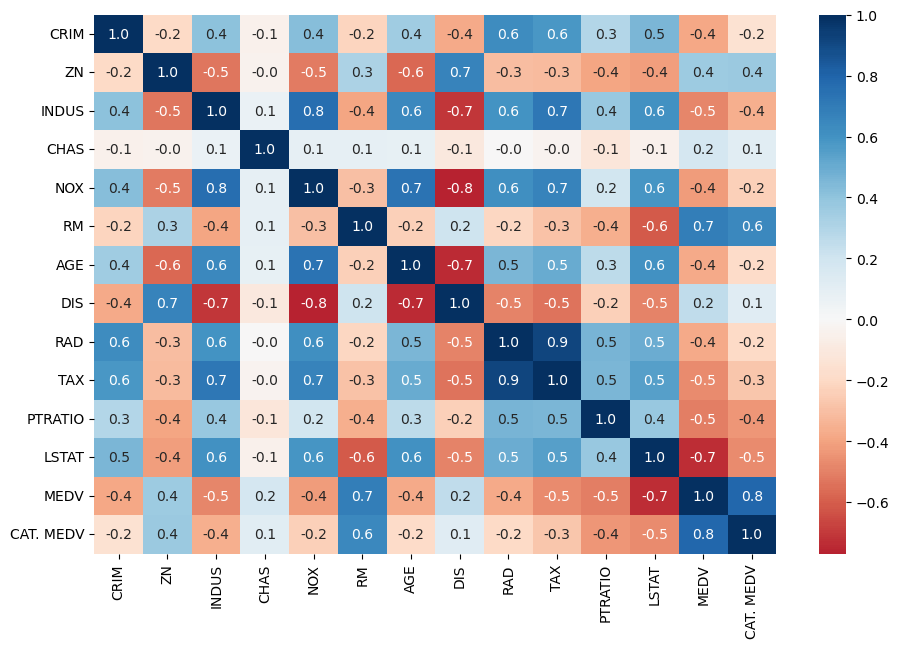

In [5]:
#HeatMap
#Initiate Correlation
corr = main_df.corr()
# Include information about values (example demonstrates how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

# PCA

In [7]:
# Choose features to reduce via PCA
features_to_pca = ['TAX', 'CRIM', 'NOX', 'INDUS']

# Input chosen features in an object
X_pca_input = main_df[features_to_pca]

In [8]:
# Standardize the features stored in object
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# Apply PCA - we can keep 1 or 2 components to reduce dimensionality
# Transform the standardized features
pca = PCA(n_components=1)
X_pca_component = pca.fit_transform(X_scaled)

# Convert to DataFrame for merging
X_pca_df = pd.DataFrame(X_pca_component, columns=['PCA_FEATURE'])

In [9]:
# Drop original correlated features
X_reduced = main_df.drop(columns=features_to_pca)

# Add PCA feature
X_reduced['PCA_FEATURE'] = X_pca_df

The main dataframe is now X_reduced

In [16]:
# Check
X_reduced.head(10)


MEDV


# Split Data

In [19]:
# # Use only the first 400 records and select columns for regression analysis
# main_df = main_df.iloc[0:400]
# predictors = ['Marketing_Spend']
# outcome = 'MEDV'
# Partition data into predictors (x) and output (y)
# X = pd.get_dummies(_df[predictors], drop_first=True)
X_predictors = X_reduced.drop('MEDV', axis=1)
y = X_reduced['MEDV']

In [20]:
# Split the data into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X_predictors, y, test_size=0.4, random_state=1)

# Build Model using Linear Regression

In [21]:
# Built the Linear Model based on the training data
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

# Make Prediction

In [22]:
train_preds = reg.predict(train_X)
valid_preds = reg.predict(valid_X)

# Prediction Matrix

In [23]:
regressionSummary(train_y, reg.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 3.7172
            Mean Absolute Error (MAE) : 2.7190
          Mean Percentage Error (MPE) : -3.2892
Mean Absolute Percentage Error (MAPE) : 14.0565


# Evaluate Perfomance

In [24]:
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.3929
       Root Mean Squared Error (RMSE) : 3.9360
            Mean Absolute Error (MAE) : 2.8469
          Mean Percentage Error (MPE) : -2.4839
Mean Absolute Percentage Error (MAPE) : 13.6781


Comparing training data to actual data:
ME increases by 317.978
RMSE increases by 0.91%
MAE increases by 1.41%
=> Overall the model's prediction does not produce too much error and is relatively adequate

# Predicted Value Graph

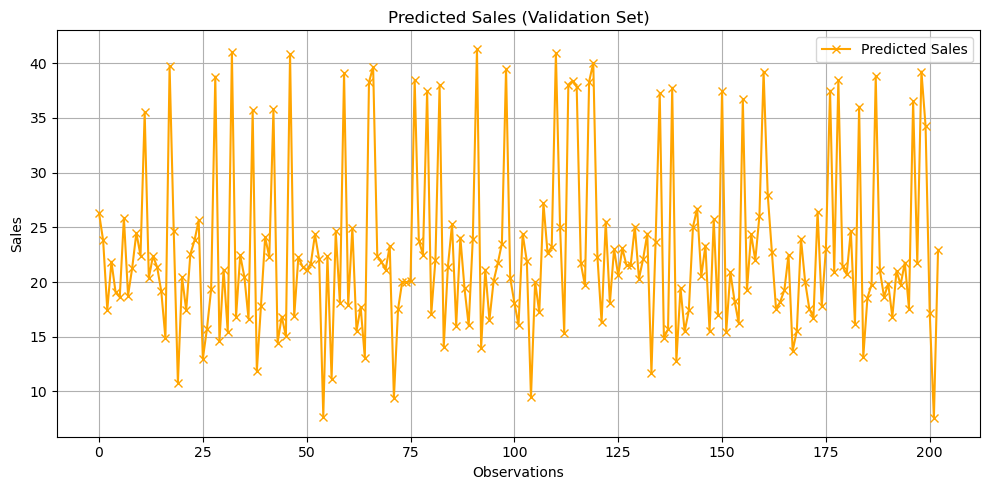

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(valid_preds, label='Predicted Sales', marker='x', color='orange')
plt.title('Predicted Sales (Validation Set)')
plt.xlabel('Observations')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual Value Graph

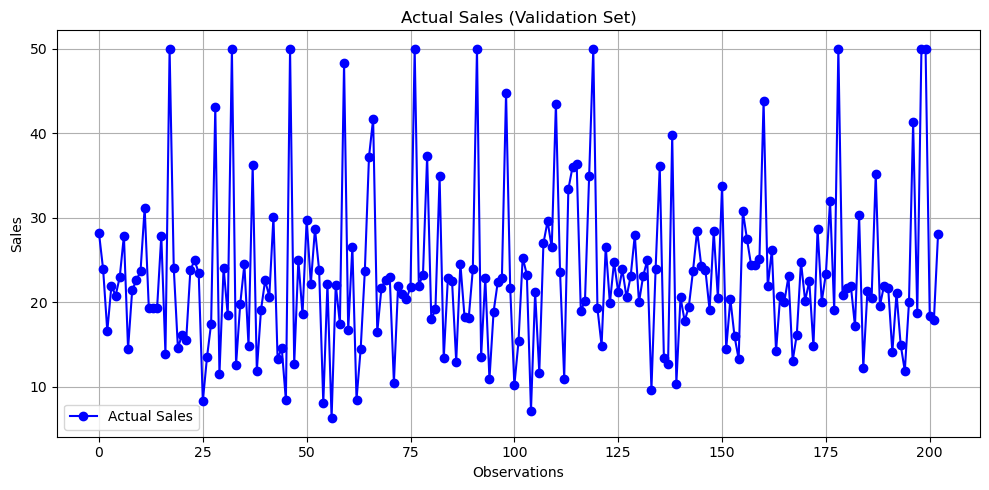

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(valid_y.values, label='Actual Sales', marker='o', color='blue')
plt.title('Actual Sales (Validation Set)')
plt.xlabel('Observations')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparision

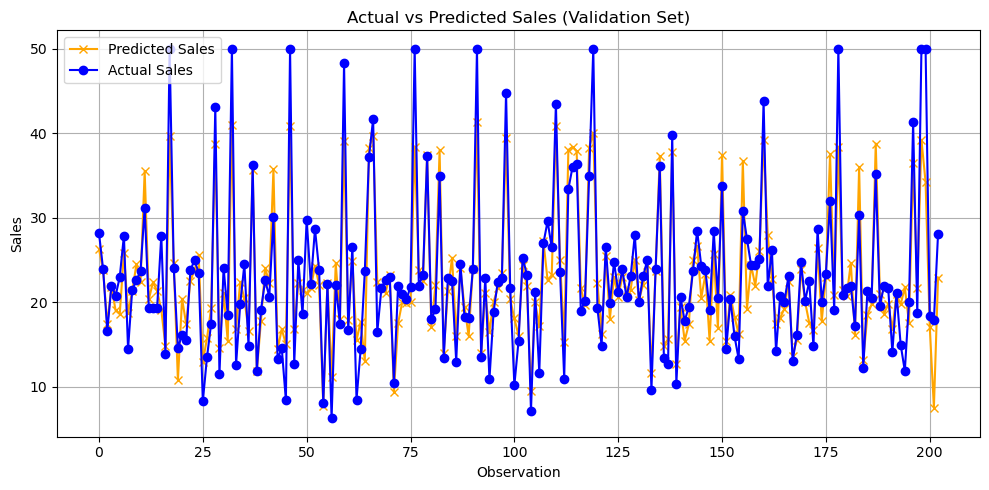

In [27]:
#Plotting Overlapping Linegraph
plt.figure(figsize=(10, 5))
plt.plot(valid_preds, label='Predicted Sales', marker='x',color='orange')
plt.plot(valid_y.values, label='Actual Sales', marker='o',color='blue')
plt.title('Actual vs Predicted Sales (Validation Set)')
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Validation Performance

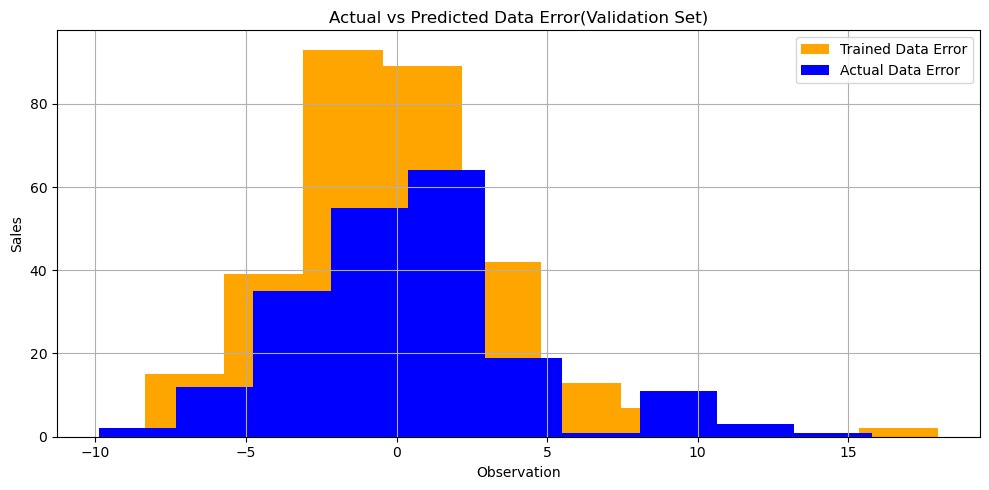

In [28]:
# Evaluate Perfomance
# training
train_e = train_y - reg.predict(train_X)
# fig, ax = plt.subplots()
# ax = train_e.hist()
# ax.set_xlabel('Training')
# validation
valid_e = valid_y - reg.predict(valid_X)
# fig, ax = plt.subplots()
# ax = valid_e.hist()
# ax.set_xlabel('Validation')

#Plotting Overlapping Histogram
plt.figure(figsize=(10, 5))
plt.hist(train_e, label='Trained Data Error',color='orange')
plt.hist(valid_e, label='Actual Data Error',color='blue')
plt.title('Actual vs Predicted Data Error(Validation Set)')
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

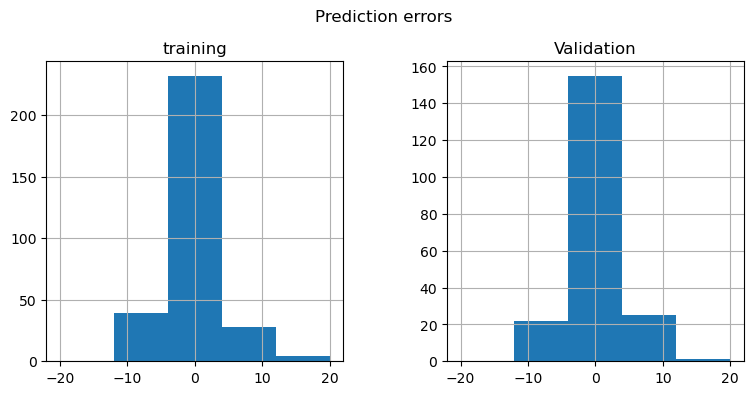

In [30]:
pred_error_train = pd.DataFrame({
    'residual': train_e,
    'dat set': 'training'
})
pred_error_valid = pd.DataFrame({
    'residual': valid_e,
    'dat set': 'validation'
})

# Replace append() with pd.concat()
boxdata_df = pd.concat([pred_error_train, pred_error_valid], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(9, 4)
common = {'bins': 5, 'range':[-20, 20]}
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
axes[0].set_title('training')
axes[1].set_title('Validation')
plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()